<center>
    
<h2> KHAI PHÁ DỮ LIỆU (DATA MINING) </h2>
<h3 style='color:red'>Các bước thực hiện Khai phá dữ liệu</h3>
    
</center>

---
<img src='pic/steps.png' width='600px'>


## Bước 1: Xác định mục tiêu và thu thập dữ liệu (Collection):

Một ngân hàng đa quốc gia ở Bồ Đào Nha triển khai thực hiện chiến dịch Marketing tới tất cả các khách hàng của mình trong một thành phố với mục đích là mời khách hàng mở sổ tiết kiệm có kỳ hạn. Các nhân viên của ngân hàng thực hiện việc marketing với nhiều hình thức khách nhau tới các khách hàng này. Chiến dịch được thực hiện xuyên suốt trong 12 tháng của năm 2023 với khoảng 45000 khách hàng.

<img src='Pic/MarketingBank.jpeg' width=500px>

Kết thúc chiến dịch cần Đánh giá hiệu quả của chiến dịch Marketing mang lại. Dựa trên dữ liệu để Phân tích giúp cải thiện hiệu quả của các chiến dịch Marketing tại các thành phố khác

**MÔ TẢ TẬP DỮ LIỆU:**
Tập dữ liệu bao gồm 45211 bản ghi tương ứng với 45211 khách hàng lưu trữ thông tin về chiến dịch marketing mở sổ tiết kiệm có kỳ hạn. Mỗi một bản ghi tương ứng với một khách hàng mà ngân hàng đã liên lạc để tiếp thị dịch vụ, bao gồm 10 thông tin như sau:
* **Phần A.Dữ liệu khách hàng:**
1. age: Tuổi của khách hàng (int)
2. job: Nghề nghiệp ("admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
3. marital: Tình trạng hôn nhân ("married","divorced","single")
4. education: Trình độ học vấn ("unknown","secondary","primary","tertiary")
5. balance: Số dữ trong tài khoản(đơn vị: Euro)
6. loan: Hiện có vay liên tiêu dùng cá nhân nào hay không (yes/no)

* **Phần B.Thông tin liên quan tới chiến dịch tiếp thị:**
7. contact: loại kết nối liên lạc tới khách hàng ("other","telephone","cellular")
8. month: Tháng liên lạc marketing cuối cùng trong năm (jan, feb, mar...nov,dec)
9. campaign: Số lần liên lạc với khách hàng này trong một chiến dịch
10. deposit: Kết quả của đợt marketing này là khách hàng có đăng ký tiền gửi tiết kiệm hay không (yes/no)


In [1]:
#gọi các thư viện:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#------------------------------
import warnings
warnings.filterwarnings('ignore')

###  Đọc tập dữ liệu
---

In [2]:
#Đọc tập dữ liệu:
data_bank_full = pd.read_csv('Data/Data_Bank_Marketing2023.csv')
data_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         45211 non-null  object
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   balance    45211 non-null  int64 
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   month      45211 non-null  object
 9   campaign   45211 non-null  int64 
 10  deposit    45211 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.8+ MB


In [3]:
#Hiển thị 5 bản ghi đầu tiên:
data_bank_full.head(5)

,id,age,job,marital,education,balance,loan,contact,month,campaign,deposit
0,cus_0,58,management,married,tertiary,2143,no,other,may,1,no
1,cus_1,44,technician,single,secondary,29,no,other,may,1,no
2,cus_2,33,entrepreneur,married,secondary,2,yes,other,may,1,no
3,cus_3,47,blue-collar,married,unknown,1506,no,other,may,1,no
4,cus_4,33,unknown,single,unknown,1,no,other,may,1,no


In [4]:
#Hiển thị 5 bản ghi cuối cùng:
data_bank_full.tail(5)

,id,age,job,marital,education,balance,loan,contact,month,campaign,deposit
45206,cus_45206,51,technician,married,tertiary,825,no,cellular,nov,3,yes
45207,cus_45207,71,retired,divorced,primary,1729,no,cellular,nov,2,yes
45208,cus_45208,72,retired,married,secondary,5715,no,cellular,nov,5,yes
45209,cus_45209,57,blue-collar,married,secondary,668,no,telephone,nov,4,no
45210,cus_45210,37,entrepreneur,married,secondary,2971,no,cellular,nov,2,no


In [5]:
data_bank_full.sample(5)

,id,age,job,marital,education,balance,loan,contact,month,campaign,deposit
26573,cus_26573,51,technician,divorced,secondary,7928,no,cellular,nov,1,no
10953,cus_10953,55,entrepreneur,married,secondary,5838,no,other,jun,2,no
37279,cus_37279,35,unemployed,single,secondary,2116,no,cellular,may,2,no
34882,cus_34882,42,admin.,married,secondary,1455,no,cellular,may,4,no
6048,cus_6048,34,blue-collar,married,primary,1255,yes,other,may,7,no


# Bước 2. Khám phá để hiểu dữ liệu (Understanding)
---
Tổng số 45211 khách hàng được tiếp thị trong chiến dịch

In [6]:
#Các thông tin của một khách hàng:
data_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         45211 non-null  object
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   balance    45211 non-null  int64 
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   month      45211 non-null  object
 9   campaign   45211 non-null  int64 
 10  deposit    45211 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.8+ MB


In [7]:
#Hiển thị các đặc trưng thống kê:
# Dữ liệu số (định lượng)
data_bank_full.describe()

,age,balance,campaign
count,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.571034
std,10.618762,3044.765829,2.136777
min,18.000000,-8019.000000,1.000000
25%,33.000000,72.000000,1.000000
50%,39.000000,448.000000,2.000000
75%,48.000000,1428.000000,3.000000
max,95.000000,102127.000000,14.000000


In [8]:
#Lọc danh sách những khách hàng liên lạc 14 lần
data_bank_full[data_bank_full['campaign']==14]

,id,age,job,marital,education,balance,loan,contact,month,campaign,deposit
2967,cus_2967,37,technician,married,tertiary,0,no,other,may,14,no
3044,cus_3044,51,unemployed,married,secondary,425,no,other,may,14,no
3149,cus_3149,50,blue-collar,married,secondary,810,no,other,may,14,no
4208,cus_4208,36,blue-collar,married,unknown,79,no,other,may,14,no
4361,cus_4361,47,blue-collar,married,unknown,-345,no,other,may,14,no
...,...,...,...,...,...,...,...,...,...,...,...
23986,cus_23986,34,technician,divorced,secondary,347,no,cellular,aug,14,no
30916,cus_30916,31,technician,single,secondary,2088,no,cellular,feb,14,no
31581,cus_31581,28,technician,single,tertiary,172,yes,cellular,apr,14,no
33778,cus_33778,29,self-employed,married,tertiary,246,no,cellular,apr,14,no


In [9]:
#Dữ liệu catagorical (định tính)
data_bank_full.describe(include='O')

,id,job,marital,education,loan,contact,month,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211
unique,45211,12,3,4,2,3,12,2
top,cus_0,blue-collar,married,secondary,no,cellular,may,no
freq,1,9732,27214,23202,37967,29285,13766,39922


### Phần A: Thông tin của khách hàng
### 2.1 Thuộc tính tuổi của khách hàng (Age) trong chiến dịch Marketing
---

In [10]:
#1. thuộc tính age:
data_bank_full['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

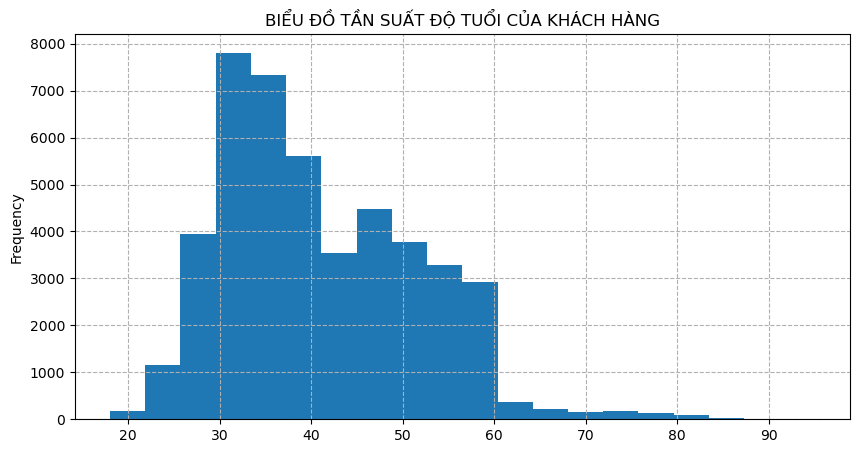

In [11]:
#Biểu đồ histogram:
plt.figure(figsize=(10,5))
data_bank_full['age'].plot(kind='hist',bins=20)
plt.title('BIỂU ĐỒ TẦN SUẤT ĐỘ TUỔI CỦA KHÁCH HÀNG')
plt.grid(ls='--')
plt.show()

In [12]:
#Tính tỷ lệ % khách hàng trong khoảng từ 28-60 tuổi:
len(data_bank_full[(data_bank_full['age']>28) &  (data_bank_full['age']<60)])/len(data_bank_full)

0.8701201035146314

**Nhận xét:**
1. Độ tuổi của khách hàng trong chiến dịch marketing mở sổ tiết kiệm có kỳ hạn nằm trong khoảng từ 18-95 tuổi, tuổi chung bình là ~41 tuổi.
2. khách hàng trong chiến dịch Marketing này tập trung chủ yếu trong khoảng từ 28-60 tuổi (chiếm ~87%)

### 2.2 Thuộc tính công việc của khách hàng (job)
---
bao gồm 12 loại công việc khác nhau: 
1. blue-collar(lao động phổ thông)
2. management (quản lý)
3. technician (chuyên viên kỹ thuật)
4. admin.   (quản trị viên)
5. services (dịch vụ)
6. retired  (nghỉ hưu)
7. self-employed (lao động tự do)
8. entrepreneur (chủ doanh nghiệp)
9. unemployed (thất nghiệp)
10. housemaid  (người giúp việc)
11. student (sinh viên)
12. unknown (không có thông tin)

In [13]:
#Thống kê số lượng theo từng công việc:
job = data_bank_full['job'].value_counts()
job

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [14]:
#xây dựng một số hàm vẽ biểu đồ:
#Hàm hiển thị text trên biểu đồ cột:
def label_bar(bar_plot,bar_label):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

#Hàm vẽ biểu đồ hình cột:
def plot_bar(r,h,p,x,y,c,t=0):
    plt.subplot(r,h,p)
    ax1 = plt.bar(x,y,color=c)
    label_bar(ax1,y)
    plt.xticks(x,
           rotation=t)
    plt.grid(ls='--')
    
#Hàm vẽ biểu đồ hình tròn:
def plot_pie(r,h,p,label,value,c):
    plt.subplot(r,h,p)
    plt.pie(value,
            labels=label,
            colors=c,
            startangle=90,
            labeldistance=1.1,
            pctdistance=0.6, 
            wedgeprops=dict(width=0.7,edgecolor='w'),
            autopct='%.2f %%')

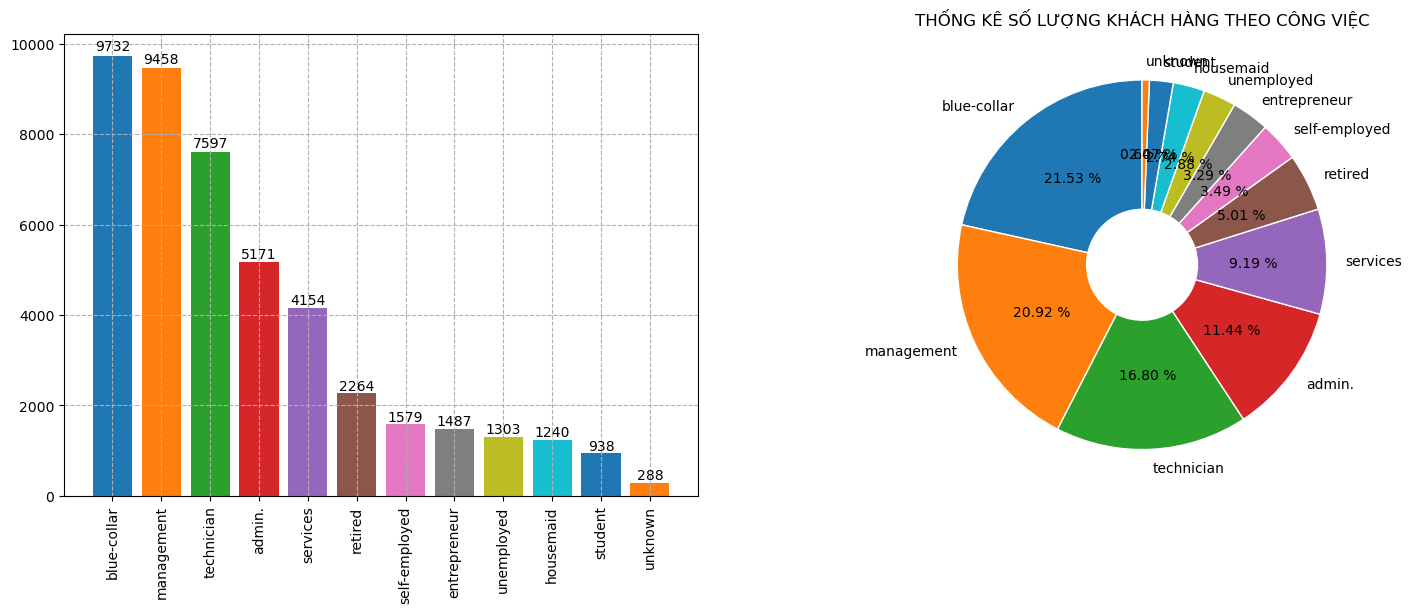

In [15]:
color1=sns.color_palette()
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu giới tính:
plot_bar(1,2,1,job.index,job.values,color1,90)
plot_pie(1,2,2,job.index,job.values,color1)
plt.title('THỐNG KÊ SỐ LƯỢNG KHÁCH HÀNG THEO CÔNG VIỆC')
plt.show()

**NHẬN XÉT:**
1. Khách hàng của đợt tiếp thị chủ yếu lao động phổ thông, quản lý, kỹ thuật viên, quản trị viên và người làm dịch vụ chiếm ~ 80% dữ liệu

### 2.3 Thống kê tình trạng hôn nhân (marital) của tập khách hàng thực hiện Marketing
---
Có 3 trạng thái hôn nhân:
1. married: có gia đình
2. single: độc thân
3. divorced: ly hôn hoặc góa bụa

In [16]:
#Thống kê số lượng theo từng trạng thái:
marital = data_bank_full['marital'].value_counts()
marital

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

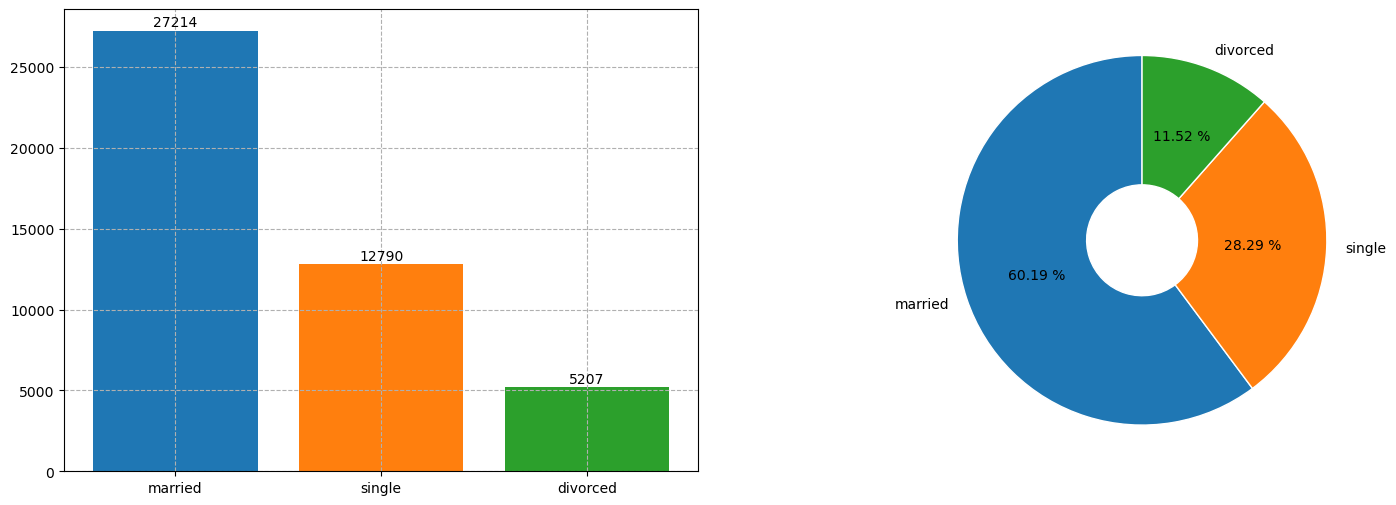

In [17]:
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu giới tính:
plot_bar(1,2,1,marital.index,marital.values,color1)
plot_pie(1,2,2,marital.index,marital.values,color1)

**NHẬN XÉT:**
Tập khách hàng của chiến dịch marketing chủ yếu là nhóm khách hàng lập gia đình (~ 60%) và độc thân (~ 28%)

### 2.4 Trình độ học vấn của khách hàng (education) thực hiện Marketing
---
Có 4 giá trị:
1. primary: Tiểu học
2. secondary: Trung học cơ sở 
3. tertiary: Cao học
4. unknown: Không có thông tin

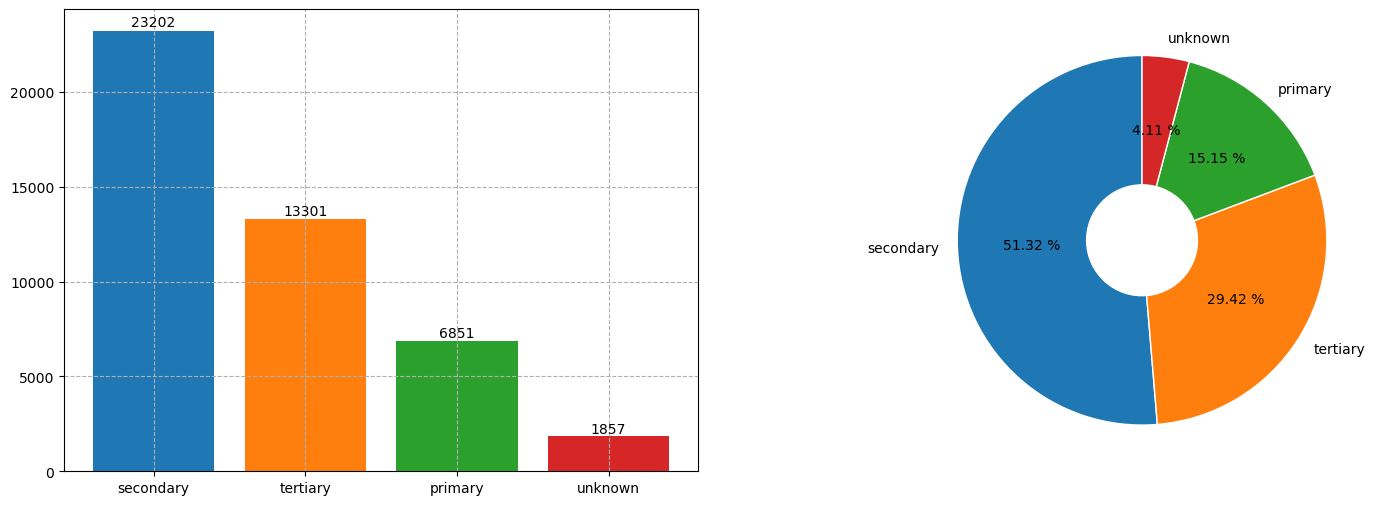

In [18]:
#Thống kê số lượng theo từng trạng thái:
education = data_bank_full['education'].value_counts()
#--------------------------
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu:
plot_bar(1,2,1,education.index,education.values,color1,0)
plot_pie(1,2,2,education.index,education.values,color1)

**NHẬN XÉT:**
1. Trên 50% khách hàng được tiếp thị trong chiến dịch Marketing có trình độ Secondary
2. Khoảng 80% khách hàng trong đợt marketing có trình độ từ Trung học cơ sở và cao học.

### 2.5 Thống kê số lượng khách hàng có khoản vay (loan) trong tập dữ liệu thực hiện Marketing
---


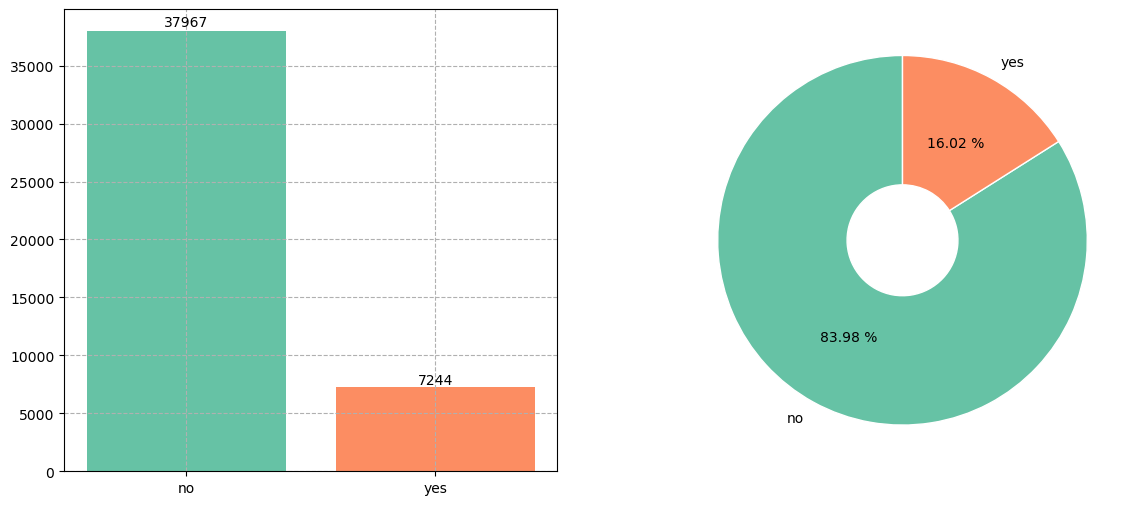

In [19]:

#Thống kê số lượng theo từng trạng thái:
loan = data_bank_full['loan'].value_counts()

plt.figure(figsize=(14,6))
color3=sns.color_palette("Set2")
#-----------------------------------------------
#Trực quan hóa số liệu giới tính:
plot_bar(1,2,1,loan.index,loan.values,color3,0)
plot_pie(1,2,2,loan.index,loan.values,color3)

**NHẬN XÉT:**
1. Đại đa số khách hàng thực hiện chiến dịch Marketing không có khoản vay nào (37967 ~ 83.98%)
2. Có khoảng 16% khách hàng đang có khoản vay khi thực hiện tiếp thị chiến dịch lần này.

### 2.6 Thuộc tính số dư tài khoản (balance) trong tập khách hàng thực hiện Marketing
---

In [20]:
#Xác định các đặc trưng thống kê
data_bank_full['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

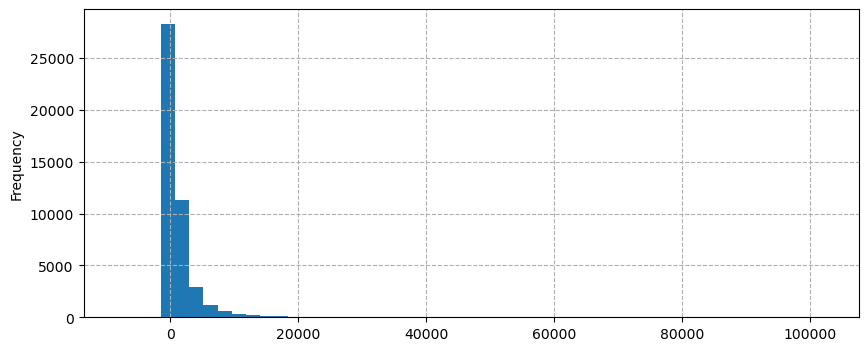

In [21]:
#Biểu đồ Histogram:
plt.figure(figsize=(10,4))
data_bank_full['balance'].plot(kind='hist', bins=50)
plt.grid(ls='--')
plt.show()

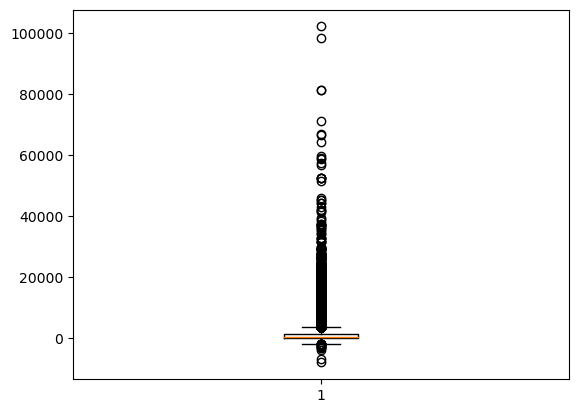

In [22]:
#Biểu đồ Boxplot:
plt.boxplot(data_bank_full['balance'])
plt.show()

In [23]:
#Tỷ lệ khách hàng có số dư <=0 trong tập dữ liệu khi thực hiện Marketing:
len(data_bank_full[data_bank_full['balance']<=0])/len(data_bank_full)

0.16102275994780033

In [24]:
#Tỷ lệ khách hàng có số dư >=2500 Euros trong tập dữ liệu khi thực hiện Marketing:
len(data_bank_full[data_bank_full['balance']>=2500])/len(data_bank_full)

0.15210900002211852

**NHẬN XÉT:**
1. Khoản dư trong tài khoản khách hàng có mức độ biến thiên lớn từ -8019 đến 102127 Euro
2. Khoản dư trung bình của mỗi tài khoản là ~ 1362 Euro
3. Số khách hàng có khoản dư <=0 chiếm ~ 16%, >=2500 Euro chiếm ~ 15%;
4. Đại đa số khách hàng trong chiến dịch Marketing có số dư nằm trong khoảng (0,2500) chiếm ~ 70% dữ liệu

### Phần B. Các thông tin liên quan đến chiến dịch marketing
### 2.7 Loại liên lạc sử dụng để marketing
---

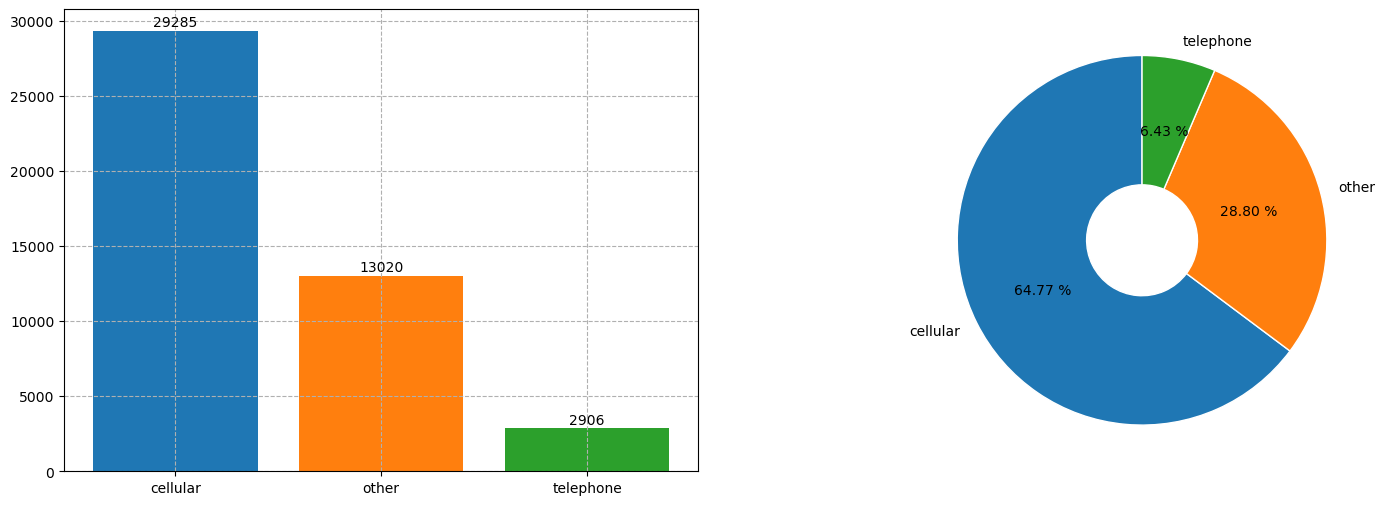

In [25]:
#Thống kê số lượng theo loại liên lạc:
contact = data_bank_full['contact'].value_counts()
#--------------------------
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu giới tính:
plot_bar(1,2,1,contact.index,contact.values,color1,0)
plot_pie(1,2,2,contact.index,contact.values,color1)

**NHẬN XÉT:**
1. Chiến dịch Marketing thực hiện chủ yếu bằng phương pháp liên lạc qua điện thoại di động (~ 65%) và Phương pháp khác (~ 29%)
2. Phương pháp liên lạc qua điện thoại bàn chỉ chiếm khoảng ~ 6.5%


### 2.8 Tổng số lần liên lạc với khách hàng thực hiện trong chiến dịch marketing
---

In [26]:
#Xác định các đặc trưng thống kê
data_bank_full['campaign'].describe()

count    45211.000000
mean         2.571034
std          2.136777
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: campaign, dtype: float64

In [27]:
df_ca = data_bank_full['campaign'].value_counts()
df_ca

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
7      1349
6      1291
8       540
9       327
10      266
11      201
12      155
13      133
14       93
Name: count, dtype: int64

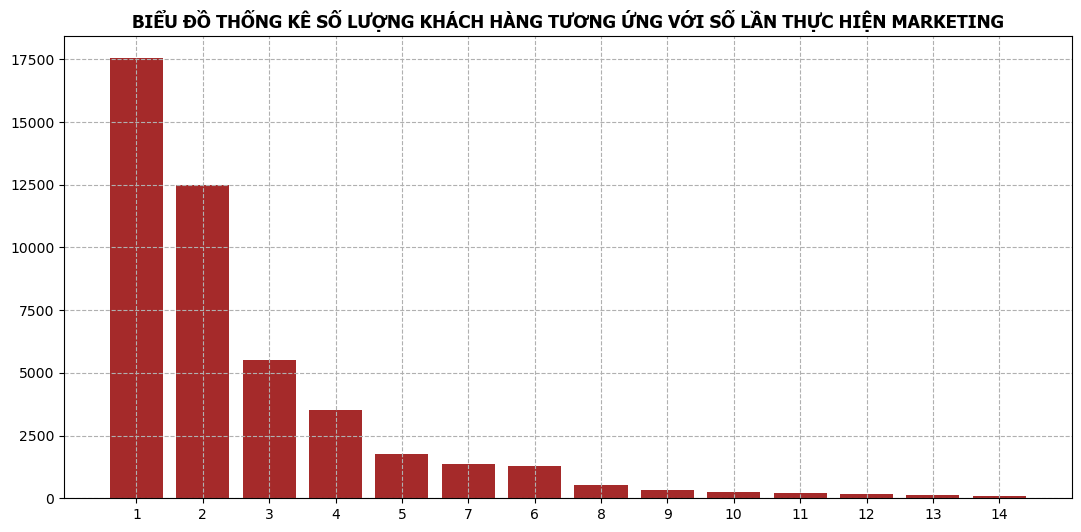

In [28]:
plt.figure(figsize=(13,6))
#Trực quan hóa số liệu giới tính:
x = list(map(str,df_ca.index))
plt.bar(x,df_ca.values,color='brown')
plt.title('BIỂU ĐỒ THỐNG KÊ SỐ LƯỢNG KHÁCH HÀNG TƯƠNG ỨNG VỚI SỐ LẦN THỰC HIỆN MARKETING',
         fontdict={'fontname':'Tahoma','fontweight':'bold','fontsize':13})
plt.grid(ls='--')
plt.show()

In [29]:
#Danh sách các khách hàng có tổng số lần liên lạc >10:
data_bank_full[data_bank_full['campaign']>10]

,id,age,job,marital,education,balance,loan,contact,month,campaign,deposit
2251,cus_2251,40,technician,married,secondary,2576,yes,other,may,11,no
2305,cus_2305,25,admin.,single,secondary,1,yes,other,may,12,no
2626,cus_2626,31,technician,married,secondary,106,no,other,may,13,no
2664,cus_2664,40,blue-collar,married,secondary,598,no,other,may,11,no
2665,cus_2665,42,blue-collar,divorced,secondary,-135,no,other,may,11,no
...,...,...,...,...,...,...,...,...,...,...,...
42817,cus_42817,45,management,single,tertiary,4831,no,cellular,jan,11,yes
44100,cus_44100,70,retired,divorced,secondary,4572,no,cellular,jul,11,no
44231,cus_44231,32,entrepreneur,married,tertiary,762,no,cellular,jul,11,yes
44583,cus_44583,24,student,single,secondary,431,no,cellular,aug,11,yes


## Bước 3. Chuẩn bị dữ liệu (Preparation):
---
Tập dữ liệu này đã được làm sạch, ko có dữ liệu thiếu, dữ liệu trùng lặp....

In [30]:
#Các thông tin của một khách hàng:
data_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         45211 non-null  object
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   balance    45211 non-null  int64 
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   month      45211 non-null  object
 9   campaign   45211 non-null  int64 
 10  deposit    45211 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.8+ MB


In [31]:
#Kiểm tra dữ liệu mising:
data_bank_full.isnull().sum()
#--> Tập dữ liệu không chứa thuộc tính Missing

id           0
age          0
job          0
marital      0
education    0
balance      0
loan         0
contact      0
month        0
campaign     0
deposit      0
dtype: int64

In [32]:
#Kiểm tra dữ liệu trùng lặp:
data_bank_full.duplicated().sum()
#--> Không có dữ liệu trùng lặp trong tập dữ liệu

0

## Bước 4. Xây dựng mô hình khai thác dữ liệu
---
<img src='pic/DataMiningModel.png' width='500px'>

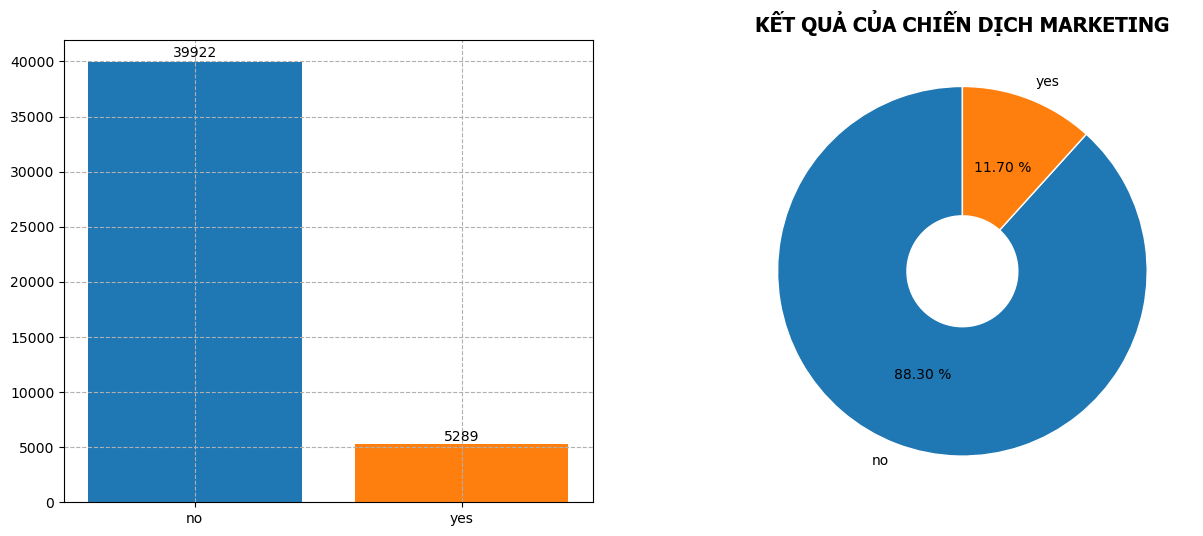

In [33]:
#Thống kê số lượng theo loại liên lạc:
y = data_bank_full['deposit'].value_counts()
#--------------------------
plt.figure(figsize=(15,6))
#Trực quan hóa số liệu:
plot_bar(1,2,1,y.index,y.values,color1,0)
plot_pie(1,2,2,y.index,y.values,color1)
plt.title('KẾT QUẢ CỦA CHIẾN DỊCH MARKETING',
         fontdict={'fontname':'Tahoma','fontweight':'bold','fontsize':15})
plt.show()

<img src='Pic/insight.png' width='200px' align='left'>

**NHẬN XÉT:**

Kết quả của chiến dịch marketing mở sổ tiết kiệm có kỳ hạn cho thấy:
Trong tổng số 45211 khách hàng thực hiện marketing, có 5 289 khách hàng đồng ý mở sổ tiết kiệm chỉ chiếm 11.79 % ,  đại đa số khách hàng không mở sổ tiết kiệm chiếm tới 88.3% --> **HIỆU QUẢ CỦA CHIẾN DỊCH RẤT THẤP**

### CÁC YẾU TỐ ẢNH HƯỞNG TỚI QUYẾT ĐỊNH MỞ SỐ TIẾT KIỆM
---

### 4.1 Đánh giá Công việc của khách hàng tới việc mở sổ

In [34]:
#Công việc ảnh hưởng tới việc mở sổ 
j_df = pd.DataFrame()

j_df['total'] = data_bank_full['job'].value_counts()
j_df['yes'] = data_bank_full[data_bank_full['deposit'] == 'yes']['job'].value_counts()

#Tính tỷ lệ đồng ý mở trên tổng số 
j_df['effective(%)'] = np.round((j_df['yes']/j_df['total'])*100,2)

j_df

,total,yes,effective(%)
job,,,
blue-collar,9732,708,7.27
management,9458,1301,13.76
technician,7597,840,11.06
admin.,5171,631,12.20
services,4154,369,8.88
retired,2264,516,22.79
self-employed,1579,187,11.84
entrepreneur,1487,123,8.27
unemployed,1303,202,15.50


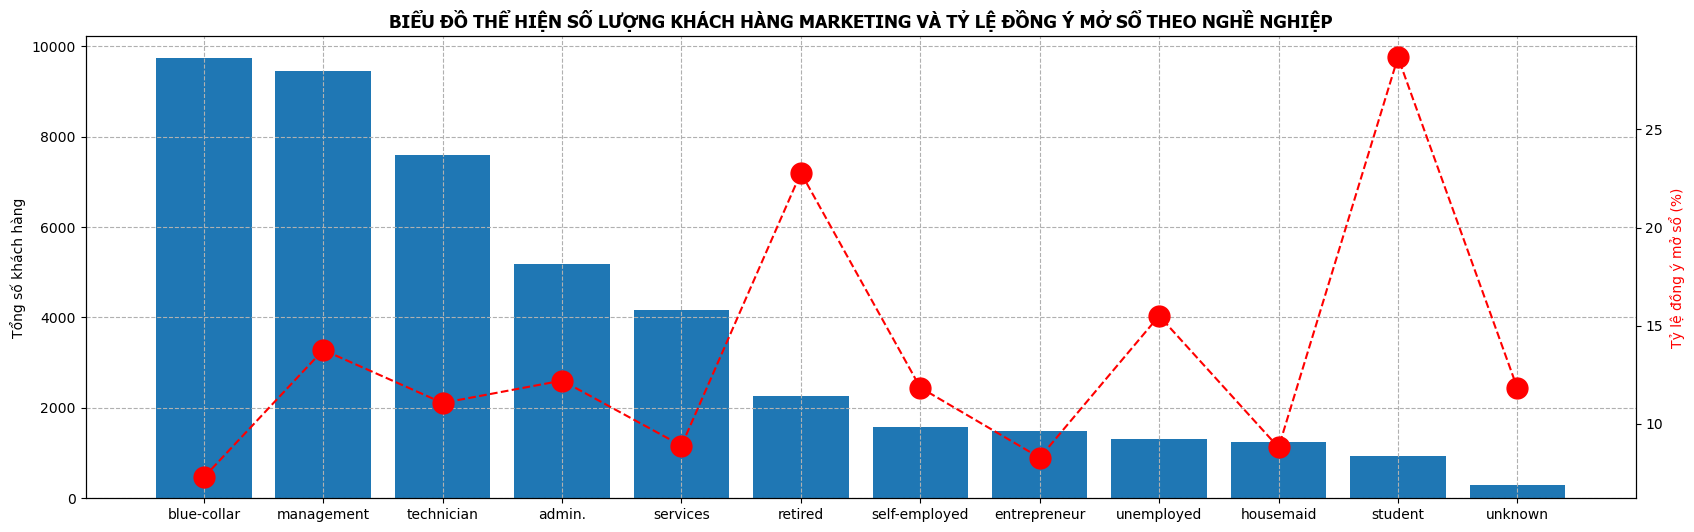

In [35]:
#Trực quan hóa trên cùng một biểu đồ:
fig, ax1 = plt.subplots(figsize=(20,6))
x = list(map(str,j_df.index))
y_total = j_df['total'].values.ravel()
y_eff = j_df['effective(%)'].values.ravel()

ax2 = ax1.twinx()
ax1.bar(x, y_total)
ax2.plot(x, y_eff, 'r--o',ms=15)


ax1.set_title('BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG KHÁCH HÀNG MARKETING VÀ TỶ LỆ ĐỒNG Ý MỞ SỔ THEO NGHỀ NGHIỆP',
             fontdict={'fontname':'Tahoma','fontweight':'bold','fontsize':13})
ax1.set_ylabel('Tổng số khách hàng', color='k')
ax2.set_ylabel('Tỷ lệ đồng ý mở sổ (%)', color='r')

ax1.grid(True,ls='--')
fig.show()

<img src='Pic/insight.png' width='300px' align='left'>

**TỪ DỮ LIỆU TA THẤY:**

Có 4 nhóm nghề nghiệp của khách hàng được tiếp thị có tỷ lệ mở sổ cao nhất là:
1. student (sinh viên) ~ 28.68%
2. retired (nghỉ hưu)  ~ 22.79%
3. unemployed (thất nghiệp) ~ 15.50%
4. management (quản lý) ~ 13.76

Nhóm khách hàng lao động phổ thông (blue-collar) tập trung tiếp thị với số lượng lớn nhất nhưng hiệu quả mang lại là thấp nhấp.

### 4.2 Đánh giá Tình trạng hôn nhân của khách hàng tới việc mở sổ
---

In [36]:
#Tình trạng hôn nhân ảnh hưởng tới việc mở sổ 
m_df = pd.DataFrame()

m_df['total'] = data_bank_full['marital'].value_counts()
m_df['yes'] = data_bank_full[data_bank_full['deposit'] == 'yes']['marital'].value_counts()

#Tính tỷ lệ đồng ý mở trên tổng số 
m_df['effective(%)'] = np.round((m_df['yes']/m_df['total'])*100,2)

m_df

,total,yes,effective(%)
marital,,,
married,27214,2755,10.12
single,12790,1912,14.95
divorced,5207,622,11.95


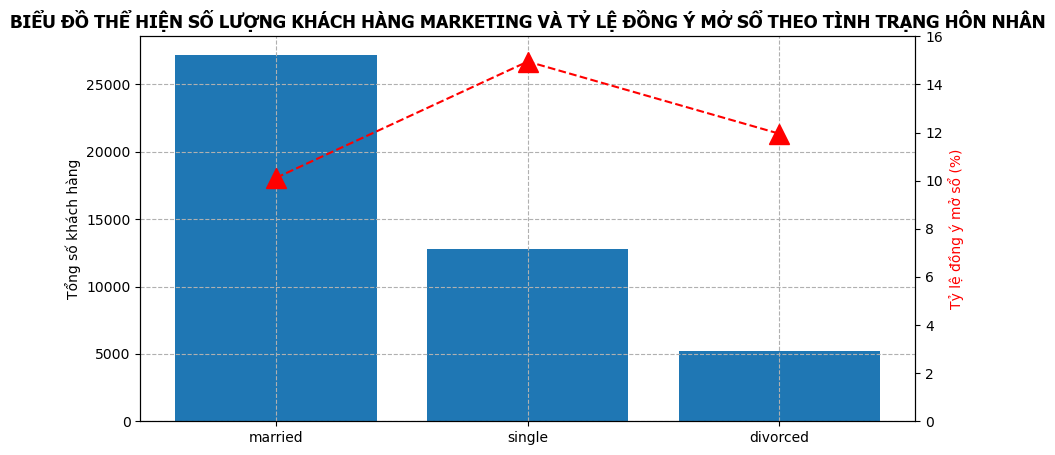

In [37]:
#Trực quan hóa trên cùng một biểu đồ:
fig, ax1 = plt.subplots(figsize=(10,5))
x = list(map(str,m_df.index))
y_total = m_df['total'].values.ravel()
y_eff = m_df['effective(%)'].values.ravel()

ax2 = ax1.twinx()
ax1.bar(x, y_total)
ax2.plot(x, y_eff, 'r--^',ms=15)


ax1.set_title('BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG KHÁCH HÀNG MARKETING VÀ TỶ LỆ ĐỒNG Ý MỞ SỔ THEO TÌNH TRẠNG HÔN NHÂN',
             fontdict={'fontname':'Tahoma','fontweight':'bold','fontsize':13})
ax1.set_ylabel('Tổng số khách hàng', color='k')
ax2.set_ylabel('Tỷ lệ đồng ý mở sổ (%)', color='r')
ax2.set_ylim(0,16)
ax1.grid(True,ls='--')
fig.show()

<img src='Pic/insight.png' width='200px' align='left'>

**TỪ DỮ LIỆU TA THẤY:**

Tình trạng hôn nhân của Khách hàng ít ảnh hưởng tới việc mở sổ do không có sự chênh lệnh nhiều giữa các nhóm (10%, 12%, 15%).  Trong 3 nhóm tình trạng hôn nhân, nhóm khách hàng độc thân (single) đang có tỷ lệ mở sổ cao nhất (~ 15%). Tỷ lệ mở sổ thấp nhất đang thuộc về nhóm khách hàng có gia đình (~ 10.12%)

### 4.3 Đánh giá trình độ học vấn (education) của khách hàng tới việc mở sổ
---
1. primary: Tiểu học
2. secondary: Trung học cơ sở 
3. tertiary: Cao học
4. unknown: Không có thông tin

In [38]:
#Trình độ học vấn ảnh hưởng tới việc mở sổ 
e_df = pd.DataFrame()

e_df['total'] = data_bank_full['education'].value_counts()
e_df['yes'] = data_bank_full[data_bank_full['deposit'] == 'yes']['education'].value_counts()

#Tính tỷ lệ đồng ý mở trên tổng số 
e_df['effective(%)'] = np.round((e_df['yes']/e_df['total'])*100,2)

e_df

,total,yes,effective(%)
education,,,
secondary,23202,2450,10.56
tertiary,13301,1996,15.01
primary,6851,591,8.63
unknown,1857,252,13.57


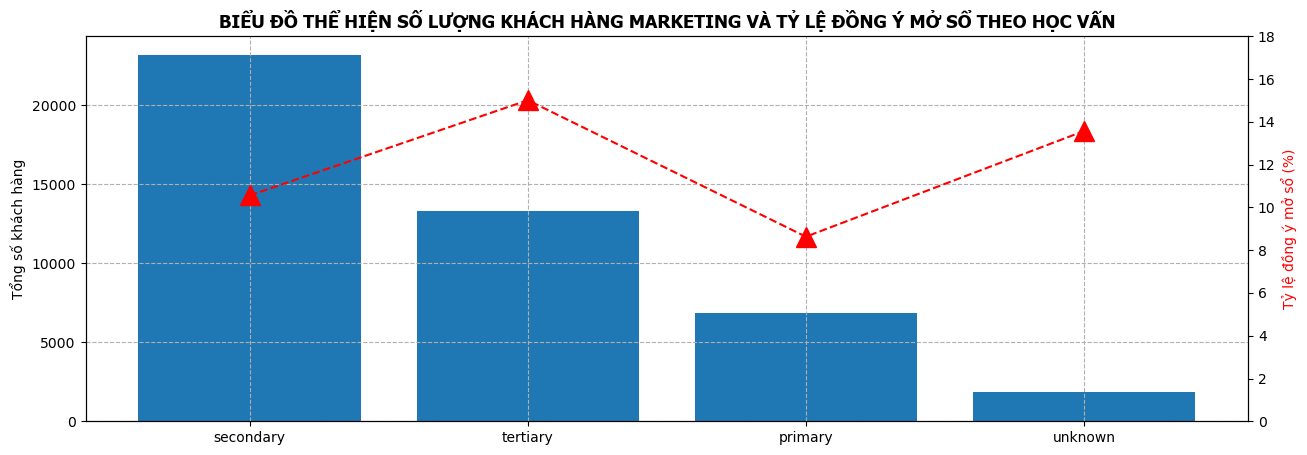

In [39]:
#Trực quan hóa trên cùng một biểu đồ:
fig, ax1 = plt.subplots(figsize=(15,5))
x = list(map(str,e_df.index))
y_total = e_df['total'].values.ravel()
y_eff = e_df['effective(%)'].values.ravel()

ax2 = ax1.twinx()
ax1.bar(x, y_total)
ax2.plot(x, y_eff, 'r--^',ms=15)


ax1.set_title('BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG KHÁCH HÀNG MARKETING VÀ TỶ LỆ ĐỒNG Ý MỞ SỔ THEO HỌC VẤN',
             fontdict={'fontname':'Tahoma','fontweight':'bold','fontsize':13})
ax1.set_ylabel('Tổng số khách hàng', color='k')
ax2.set_ylabel('Tỷ lệ đồng ý mở sổ (%)', color='r')
ax2.set_ylim(0,18)

plt.xticks(rotation=90)
ax1.grid(True,ls='--')
fig.show()

<img src='Pic/insight.png' width='200px' align='left'>

**TỪ DỮ LIỆU TA THẤY:**

Trình độ học vấn của khách hàng được tiếp thị ít ảnh hưởng tới kết quả, do không có sự thay đổi rõ rệt về tỷ lệ đồng ý mở sổ, tỷ lệ của 4 nhóm trong khoảng 8.63% của Primary tới 15.01% của nhóm Tertiary, 
    

### 4.4 Đánh giá Độ tuổi (age) khách hàng tới hiệu quả của chiến dịch Marketing
---
Tuổi của khách hàng thực hiện tiếp thị từ 18-95 tuổi, trong đó 87% nằm trong khoảng từ 28-60 tuổi

In [42]:
data_bank_full['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [43]:
#Nhóm khách hàng theo từng khoảng tuổi:
def group_age(x):
    if (18<=x<30):
        return '1[<30)'
    elif (30 <= x < 40):
        return '2[30-40)'
    elif (40 <= x < 50):
        return '3[40-50)'
    elif (50 <= x <= 60):
        return '4[50-60)'
    elif (60 <= x <= 70):
        return '5[60-70)'
    else:
        return '6[>70)'

In [45]:
#Tạo một cột mới chia theo nhóm tuổi ở trên:
data_bank_full['age_group'] = data_bank_full['age'].apply(lambda x: group_age(x))
data_bank_full

,id,age,job,marital,education,balance,loan,contact,month,campaign,deposit,age_group
0,cus_0,58,management,married,tertiary,2143,no,other,may,1,no,4[50-60)
1,cus_1,44,technician,single,secondary,29,no,other,may,1,no,3[40-50)
2,cus_2,33,entrepreneur,married,secondary,2,yes,other,may,1,no,2[30-40)
3,cus_3,47,blue-collar,married,unknown,1506,no,other,may,1,no,3[40-50)
4,cus_4,33,unknown,single,unknown,1,no,other,may,1,no,2[30-40)
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,cus_45206,51,technician,married,tertiary,825,no,cellular,nov,3,yes,4[50-60)
45207,cus_45207,71,retired,divorced,primary,1729,no,cellular,nov,2,yes,6[>70)
45208,cus_45208,72,retired,married,secondary,5715,no,cellular,nov,5,yes,6[>70)
45209,cus_45209,57,blue-collar,married,secondary,668,no,telephone,nov,4,no,4[50-60)


In [46]:
#Thống kê tuổi khách hàng ảnh hưởng tới việc mở sổ 
a_df = pd.DataFrame()

a_df['total'] = data_bank_full['age_group'].value_counts()
a_df['yes'] = data_bank_full[data_bank_full['deposit'] == 'yes']['age_group'].value_counts()

#Tính tỷ lệ đồng ý mở trên tổng số 
a_df['effective(%)'] = np.round((a_df['yes']/a_df['total'])*100,2)
a_df.sort_index(inplace=True)
a_df

,total,yes,effective(%)
age_group,,,
1[<30),5273,928,17.60
2[30-40),18089,1913,10.58
3[40-50),11655,1063,9.12
4[50-60),9006,883,9.80
5[60-70),701,284,40.51
6[>70),487,218,44.76


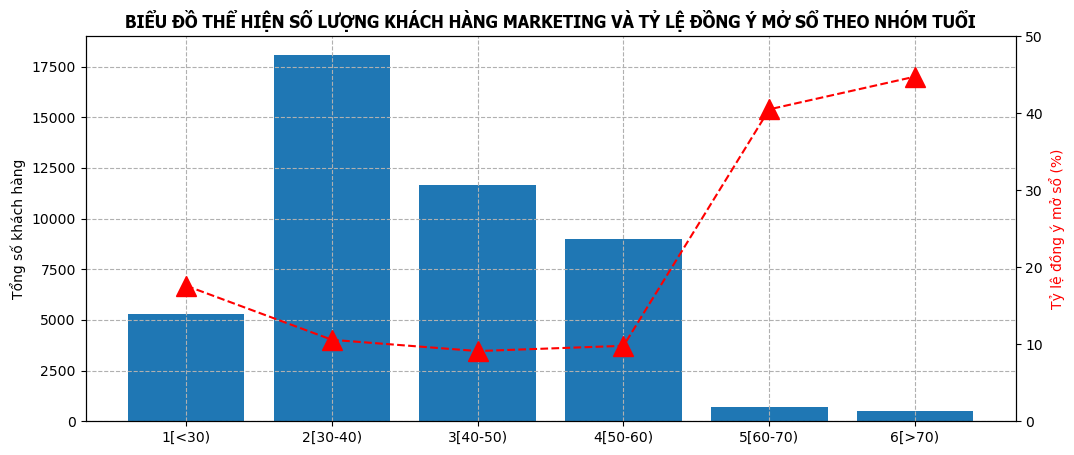

In [47]:
#Trực quan hóa trên cùng một biểu đồ:
fig, ax1 = plt.subplots(figsize=(12,5))
x = list(map(str,a_df.index))
y_total = a_df['total'].values.ravel()
y_eff = a_df['effective(%)'].values.ravel()

ax2 = ax1.twinx()
ax1.bar(x, y_total)
ax2.plot(x, y_eff, 'r--^',ms=15)


ax1.set_title('BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG KHÁCH HÀNG MARKETING VÀ TỶ LỆ ĐỒNG Ý MỞ SỔ THEO NHÓM TUỔI',  
              fontdict={'fontname':'Tahoma','fontweight':'bold','fontsize':12})
ax1.set_ylabel('Tổng số khách hàng', color='k')
ax2.set_ylabel('Tỷ lệ đồng ý mở sổ (%)', color='r')
ax2.set_ylim(0,50)

ax1.grid(True,ls='--')
fig.show()

<img src='Pic/insight.png' width='200px' align='left'>

**TỪ DỮ LIỆU TA THẤY:**

Tuổi của khách hàng ảnh hưởng lớn tới hiệu quả của chiến dịch Marketing. Chiến dịch đạt hiệu quả cao nhất với nhóm khách hàng từ 60 tuổi trở lên với tỷ lệ cao đến trên 40%, sau đó là khách hàng trẻ tuổi dưới 30 có tỷ lệ 17.6%; Các khách hàng từ 30-60 tuổi có tỷ lệ thành công thấp <=10%

### 4.5 Đánh giá Số dư tài khoản (blance) ảnh hưởng tới việc mở sổ
---
Số dư tài khoản của khách hàng có khoảng biến thiên lớn; 16% số khách hàng trong đợt tiếp thị có số dư <=0 euro; 15% khách hàng có số dư >=2500 euro; 70% khách hàng có số dữ nằm trong khoảng từ 0-2500 euro

In [48]:
data_bank_full['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [49]:
#Nhóm theo từng khoảng tuổi:
def group_balance(x):
    if (x<=0):
        return '0 [<=0)'
    elif (0 < x < 500):
        return '1 (0-500)'
    elif (500 <= x < 1000):
        return '2 [500-1000)'
    elif (1000 <= x < 2500):
        return '3 [1000-2500)'
    elif (2500 <= x < 5000):
        return '4 [2500-5000)'
    else:
        return '5 [>=5000)'

In [50]:
#Tạo một cột mới chia theo nhóm tuổi:
data_bank_full['balance_group'] = data_bank_full['balance'].apply(lambda x: group_balance(x))
data_bank_full

,id,age,job,marital,education,balance,loan,contact,month,campaign,deposit,age_group,balance_group
0,cus_0,58,management,married,tertiary,2143,no,other,may,1,no,4[50-60),3 [1000-2500)
1,cus_1,44,technician,single,secondary,29,no,other,may,1,no,3[40-50),1 (0-500)
2,cus_2,33,entrepreneur,married,secondary,2,yes,other,may,1,no,2[30-40),1 (0-500)
3,cus_3,47,blue-collar,married,unknown,1506,no,other,may,1,no,3[40-50),3 [1000-2500)
4,cus_4,33,unknown,single,unknown,1,no,other,may,1,no,2[30-40),1 (0-500)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,cus_45206,51,technician,married,tertiary,825,no,cellular,nov,3,yes,4[50-60),2 [500-1000)
45207,cus_45207,71,retired,divorced,primary,1729,no,cellular,nov,2,yes,6[>70),3 [1000-2500)
45208,cus_45208,72,retired,married,secondary,5715,no,cellular,nov,5,yes,6[>70),5 [>=5000)
45209,cus_45209,57,blue-collar,married,secondary,668,no,telephone,nov,4,no,4[50-60),2 [500-1000)


In [51]:
#Số dư tài khoản khách hàng ảnh hưởng tới việc mở sổ 
b_df = pd.DataFrame()

b_df['total'] = data_bank_full['balance_group'].value_counts()
b_df['yes'] = data_bank_full[data_bank_full['deposit'] == 'yes']['balance_group'].value_counts()

#Tính tỷ lệ đồng ý mở trên tổng số 
b_df['effective(%)'] = np.round((b_df['yes']/b_df['total'])*100,2)
b_df.sort_index(inplace=True)
b_df

,total,yes,effective(%)
balance_group,,,
0 [<=0),7280,502,6.90
1 (0-500),16357,1680,10.27
2 [500-1000),6932,854,12.32
3 [1000-2500),7765,1099,14.15
4 [2500-5000),4030,713,17.69
5 [>=5000),2847,441,15.49


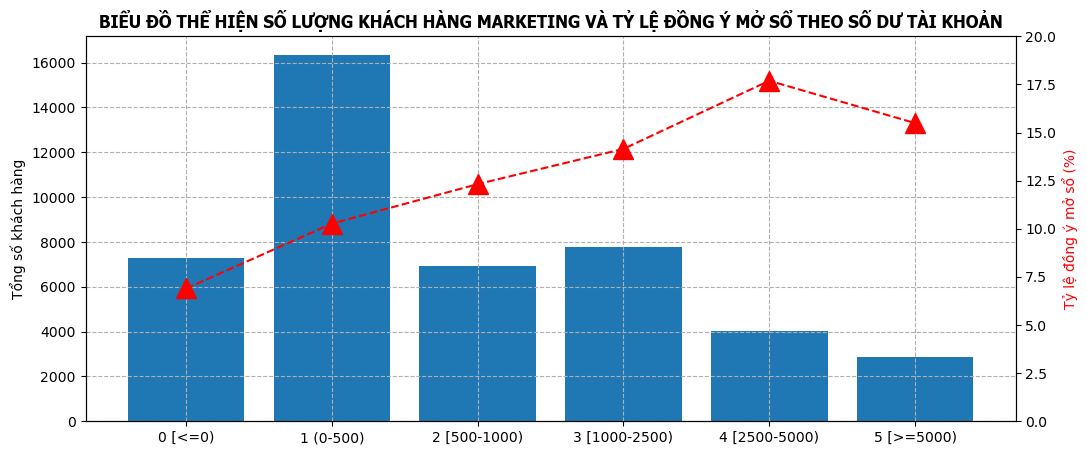

In [52]:
#Trực quan hóa trên cùng một biểu đồ:
fig, ax1 = plt.subplots(figsize=(12,5))
x = list(map(str,b_df.index))
y_total = b_df['total'].values.ravel()
y_eff = b_df['effective(%)'].values.ravel()

ax2 = ax1.twinx()
ax1.bar(x, y_total)
ax2.plot(x, y_eff, 'r--^',ms=15)


ax1.set_title('BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG KHÁCH HÀNG MARKETING VÀ TỶ LỆ ĐỒNG Ý MỞ SỔ THEO SỐ DƯ TÀI KHOẢN',
             fontdict={'fontname':'Tahoma','fontweight':'bold','fontsize':12})
ax1.set_ylabel('Tổng số khách hàng', color='k')
ax2.set_ylabel('Tỷ lệ đồng ý mở sổ (%)', color='r')
ax2.set_ylim(0,20)
plt.xticks(rotation=90)
ax1.grid(True,ls='--')
fig.show()

<img src='Pic/insight.png' width='200px' align='left'>

**TỪ DỮ LIỆU TA THẤY:**

1. Số dư trong tài khoản của khách hàng cũng là yếu tố ảnh hưởng tới kết quả của chiến dịch Marketing. 
2. Các khách hàng có số dư tài khoản <=0 có tỷ lệ mở sổ thấp nhất (6.9%); tỷ lệ mở sổ cao nhất là nhóm khách hàng có số dư trong khoảng từ 2500-5000 euro; 
3. Các khách hàng có số dư tài khoản từ 1000 euro trở lên khả năng mở sổ là cao 

### 4.6 Khoản vay của khách hàng ảnh hưởng tới việc mở sổ
---

In [53]:
#Khoản vay của khách hàng ảnh hưởng tới việc mở sổ 
l_df = pd.DataFrame()

l_df['total'] = data_bank_full['loan'].value_counts()
l_df['yes'] = data_bank_full[data_bank_full['deposit'] == 'yes']['loan'].value_counts()

#Tính tỷ lệ đồng ý mở trên tổng số 
l_df['effective(%)'] = np.round((l_df['yes']/l_df['total'])*100,2)

l_df

,total,yes,effective(%)
loan,,,
no,37967,4805,12.66
yes,7244,484,6.68


<img src='Pic/insight.png' width='200px' align='left'>

**TỪ DỮ LIỆU TA THẤY:**

Khách hàng đang có khoản vay có tỷ lệ tiếp thị thành công là 6.68% chỉ bằng một nửa so với tỷ lệ tiếp thị thành công của nhóm khách hàng không có khoản vay nào (12.66%); Như vậy việc một khách hàng có hay không có khoản vay ảnh hưởng lớn tới hiệu quả của chiến dịch tiêp thị.

### 4.7 Đánh giá Loại hình liên lạc (contact) tới kết quả của chiến dịch
---

In [54]:
#Loại hình liên lạc ảnh hưởng tới việc mở sổ 
c_df = pd.DataFrame()

c_df['total'] = data_bank_full['contact'].value_counts()
c_df['yes'] = data_bank_full[data_bank_full['deposit'] == 'yes']['contact'].value_counts()

#Tính tỷ lệ đồng ý mở trên tổng số 
c_df['effective(%)'] = np.round((c_df['yes']/c_df['total'])*100,2)

c_df

,total,yes,effective(%)
contact,,,
cellular,29285,4369,14.92
other,13020,530,4.07
telephone,2906,390,13.42


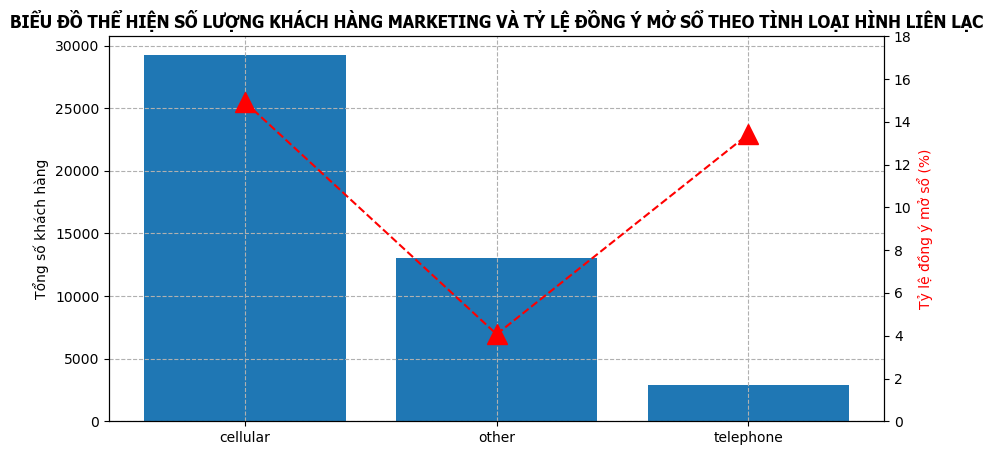

In [55]:
#Trực quan hóa trên cùng một biểu đồ:
fig, ax1 = plt.subplots(figsize=(10,5))
x = list(map(str,c_df.index))
y_total = c_df['total'].values.ravel()
y_eff = c_df['effective(%)'].values.ravel()

ax2 = ax1.twinx()
ax1.bar(x, y_total)
ax2.plot(x, y_eff, 'r--^',ms=15)


ax1.set_title('BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG KHÁCH HÀNG MARKETING VÀ TỶ LỆ ĐỒNG Ý MỞ SỔ THEO TÌNH LOẠI HÌNH LIÊN LẠC',
             fontdict={'fontname':'Tahoma','fontweight':'bold','fontsize':12})
ax1.set_ylabel('Tổng số khách hàng', color='k')
ax2.set_ylabel('Tỷ lệ đồng ý mở sổ (%)', color='r')
ax2.set_ylim(0,18)


ax1.grid(True,ls='--')
fig.show()

<img src='Pic/insight.png' width='200px' align='left'>

**TỪ DỮ LIỆU TA THẤY:**

Phương thức liên lạc tiếp thị thông qua Điện thoại đi động và cố định cho thấy hiệu quả tiếp thị tốt hơn nhiều với tỷ lệ đồng ý lần lượt là 14.92% và 13.42% trong khi phương thức liên lạc tiếp thị khác chỉ đạt 4.07%

### 4.8 Số lần liên lạc tiếp thị tới khách hàng
---
Số lần tiếp thị tới khách hàng nằm trong khoảng từ 1-14 lần

In [56]:
#Thông kê số lượng theo số lần liên lạc tư vấn:
data_bank_full['campaign'].value_counts()
#--> Đại đa Số khách hàng có số lần liên lạc <10; 


campaign
1     17544
2     12505
3      5521
4      3522
5      1764
7      1349
6      1291
8       540
9       327
10      266
11      201
12      155
13      133
14       93
Name: count, dtype: int64

In [57]:
#Số lần liên lạc tiếp thị khách hàng ảnh hưởng tới việc mở sổ 
ca_df = pd.DataFrame()

ca_df['total'] = data_bank_full['campaign'].value_counts()
ca_df['yes'] = data_bank_full[data_bank_full['deposit'] == 'yes']['campaign'].value_counts()

#Tính tỷ lệ đồng ý mở trên tổng số 
ca_df['effective(%)'] = np.round((ca_df['yes']/ca_df['total'])*100,2)
ca_df

,total,yes,effective(%)
campaign,,,
1,17544,2561,14.60
2,12505,1401,11.20
3,5521,618,11.19
4,3522,317,9.00
5,1764,139,7.88
7,1349,64,4.74
6,1291,92,7.13
8,540,32,5.93
9,327,21,6.42


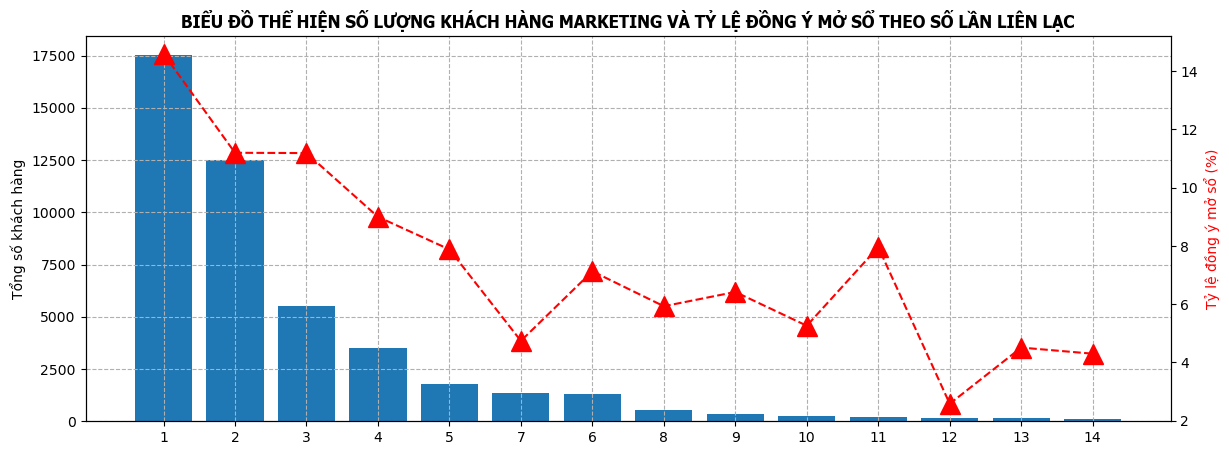

In [58]:
#Trực quan hóa trên cùng một biểu đồ:
fig, ax1 = plt.subplots(figsize=(14,5))
x = list(map(str,ca_df.index))
y_total = ca_df['total'].values.ravel()
y_eff = ca_df['effective(%)'].values.ravel()

ax2 = ax1.twinx()
ax1.bar(x, y_total)
ax2.plot(x, y_eff, 'r--^',ms=15)


ax1.set_title('BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG KHÁCH HÀNG MARKETING VÀ TỶ LỆ ĐỒNG Ý MỞ SỔ THEO SỐ LẦN LIÊN LẠC',
             fontdict={'fontname':'Tahoma','fontweight':'bold','fontsize':12})
ax1.set_ylabel('Tổng số khách hàng', color='k')
ax2.set_ylabel('Tỷ lệ đồng ý mở sổ (%)', color='r')

plt.xticks(rotation=90)
ax1.grid(True,ls='--')
fig.show()

<img src='Pic/insight.png' width='200px' align='left'>

**TỪ DỮ LIỆU TA THẤY:**

1. Số lần liên lạc cũng ảnh hưởng đến hiệu quả của chiến dịch.
2. Nhân viên liên lạc thực hiện marketing tới khách hàng từ 1 lần tới 14 lần. 
3. Tỷ lệ mở sổ cao nhất có số lần liên lạc là 1, 2, 3; Càng liên lạc nhiều tỷ lệ thất bại càng cao.

### 4.9 Thời gian tiếp thị trong năm ảnh hưởng tới hiệu quả của chiến dịch marketing
---
Chiến dịch marketing này được thực hiện trong suốt 12 tháng trong năm 2012.

In [59]:
#Thống kê số lượng tiếp thị theo tháng:
data_bank_full['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [60]:
#Thời gian tiếp thị khách hàng ảnh hưởng tới việc mở sổ 
from datetime import datetime
mo_df = pd.DataFrame()

mo_df['total'] = data_bank_full['month'].value_counts()
mo_df['yes'] = data_bank_full[data_bank_full['deposit'] == 'yes']['month'].value_counts()

#Tính tỷ lệ đồng ý mở trên tổng số 
mo_df['effective(%)'] = np.round((mo_df['yes']/mo_df['total'])*100,2)

mo_df.reset_index(inplace=True)
#mo_df['num'] = mo_df['month'].apply(lambda x: datetime.strptime(str(x),'%b').tm_mon)

#mo_df.sort_values(by=['num'],inplace=True)
mo_df

,month,total,yes,effective(%)
0,may,13766,925,6.72
1,jul,6895,627,9.09
2,aug,6247,688,11.01
3,jun,5341,546,10.22
4,nov,3970,403,10.15
5,apr,2932,577,19.68
6,feb,2649,441,16.65
7,jan,1403,142,10.12
8,oct,738,323,43.77
9,sep,579,269,46.46


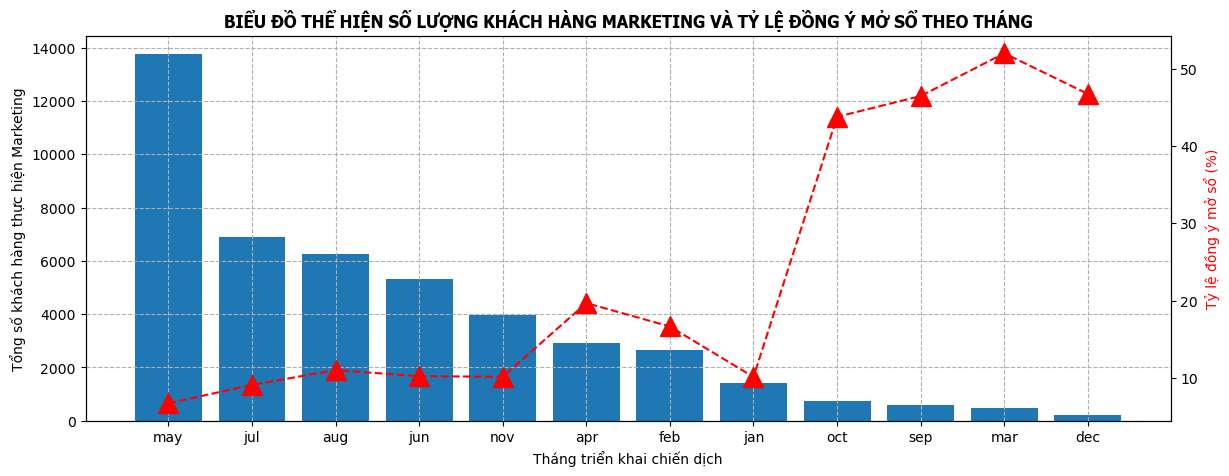

In [61]:
#Trực quan hóa trên cùng một biểu đồ:
fig, ax1 = plt.subplots(figsize=(14,5))
x = list(map(str,mo_df.month))
y_total = mo_df['total'].values.ravel()
y_eff = mo_df['effective(%)'].values.ravel()

ax2 = ax1.twinx()
ax1.bar(x, y_total)
ax2.plot(x, y_eff, 'r--^',ms=15)


ax1.set_title('BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG KHÁCH HÀNG MARKETING VÀ TỶ LỆ ĐỒNG Ý MỞ SỔ THEO THÁNG',
              fontdict={'fontname':'Tahoma','fontweight':'bold','fontsize':12})
ax1.set_ylabel('Tổng số khách hàng thực hiện Marketing', color='k')
ax2.set_ylabel('Tỷ lệ đồng ý mở sổ (%)', color='r')
ax1.set_xlabel('Tháng triển khai chiến dịch')

ax1.grid(True,ls='--')
fig.show()

<img src='Pic/insight.png' width='300px' align='left'>

**TỪ DỮ LIỆU TA THẤY:**

1. chiến dịch Marketing được thực hiện trong suốt 12 tháng trong năm nhưng, quy mô và mức độ không đồng đều. 
2. Chiến dịch đẩy mạnh trong 4 tháng: 5, 6, 7, 8 trong đó mạnh nhất là tháng 5
3. Thời gian thực hiện tiếp thị ảnh hưởng tới hiệu quả của chiến dịch; Hiệu quả cao nhất là tháng 3 sau đó là 12, 9, 10. 
4. Các tháng đẩy mạnh tiếp thị lại là những tháng có tỷ lệ thành công thấp nhất, hiệu quả không cao

## TỔNG KẾT
---
<img src='pic/decision.jpg' width=500px>
Từ các phân tích và đánh giá dựa trên dữ liệu của chiến dịch Marketing đã thực hiện, cho thấy việc thực hiện tiếp thị của ngân hàng cho toàn bộ khách hàng thuộc mọi đối tượng tuổi tác, ngành nghề, kéo dài trong suốt cả một năm...là không hiệu quả. 

Để cải thiện và nâng cao hiệu quả cho chiến dịch Marketing sắp tới ngân hàng nên lưu ý một số đề xuất như sau:

<img src='Pic/insight.png' width='400px' align='left'>

**ĐỀ XUẤT 1:** Thực hiện chiến dịch tiếp thị nên chia làm 2 đợt tập trung vào khoảng thời gian đầu năm và cuối năm, mỗi đợt 3 tháng: 

    * Đợt 1: Tháng 2, 3, 4
    * Đợt 2: Tháng 9, 10, 12

**ĐỀ XUẤT 2:** Tập trung tiếp thị với Khách hàng trẻ (<30 tuổi) và già (>=60 tuổi)

**ĐỀ XUẤT 3:** 4 Nhóm ngành nghề của khách hàng ưu tiên lựa chọn cho việc marketing: student (sinh viên); retired (nghỉ hưu); unemployed (thất nghiệp); management (quản lý)

**ĐỀ XUẤT 4:** Tập trung vào các khách hàng có số dư tài khoản từ 1000 euro trở lên và không có khoản vay cá nhân nào

**ĐỀ XUẤT 5:** Nên sử dụng phương thức liên lạc thông qua điện thoại di động và cố định

**ĐỀ XUẤT 6:** Chỉ nên liên lạc marketing tối đa 3 lần với mỗi một khách hàng.

<img src='Pic/action.jpg' width=600px>